In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = 'adult/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

data = pd.read_csv(data_path, names=column_names, sep = ",", skipinitialspace=True,  header=None)

data["wage_class"] = data["wage_class"].map({"<=50K": 0, ">50K": 1})

data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


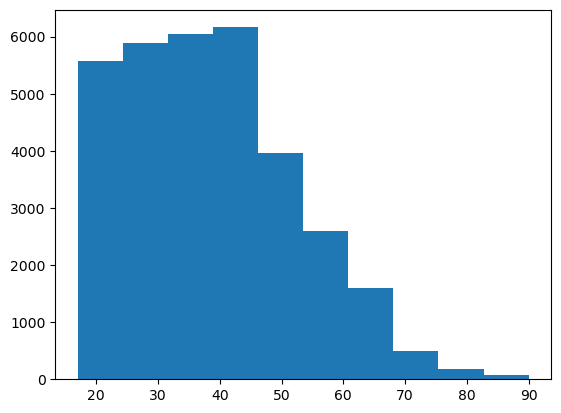

In [2]:
plt.hist(data.age)
plt.show()

In [3]:
data.age.min()

17

In [4]:
data.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [5]:
data.groupby("workclass")["wage_class"].mean()

workclass
?                   0.104031
Federal-gov         0.386458
Local-gov           0.294792
Never-worked        0.000000
Private             0.218673
Self-emp-inc        0.557348
Self-emp-not-inc    0.284927
State-gov           0.271957
Without-pay         0.000000
Name: wage_class, dtype: float64

In [6]:
data["workclass"].replace({"Never-worked": "?", "Without-pay": "?"}).value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: count, dtype: int64

In [7]:
data["workclass"] = data["workclass"].replace({"Never-worked": "?", "Without-pay": "?"})

In [8]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
data = data.drop(["fnlwgt"], axis=1)

In [10]:
pd.crosstab(data.education, data.education_num)

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


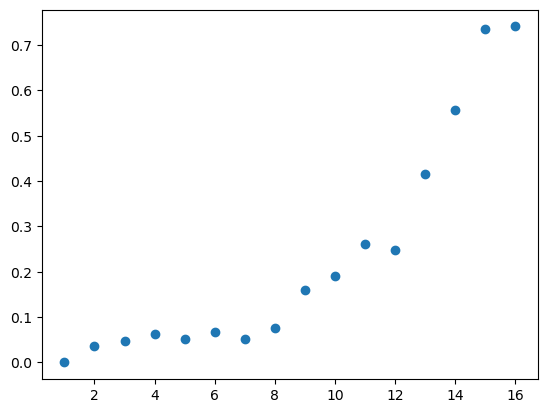

In [11]:
edu_wage = data.groupby("education_num")["wage_class"].mean()
plt.scatter(edu_wage.index, edu_wage)
plt.show()

In [12]:
data = data.drop(["education"], axis=1)

In [13]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [14]:
# przeskakujemy: marital_status	occupation	relationship	race

In [15]:
data["sex"] = data.sex.replace({"Male": 0, "Female":1})

C:\Users\mlempicki\AppData\Local\Temp\ipykernel_14356\1347072474.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["sex"] = data.sex.replace({"Male": 0, "Female":1})


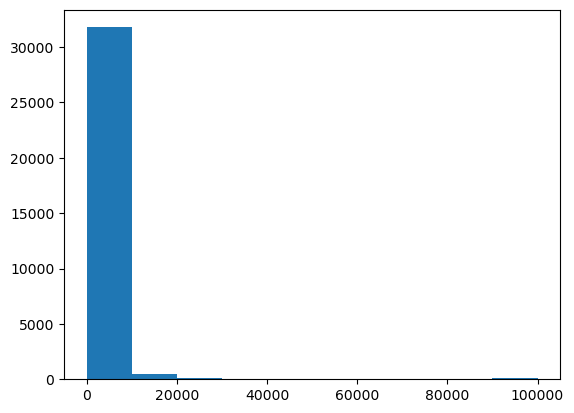

In [16]:
plt.hist(data.capital_gain)
plt.show()

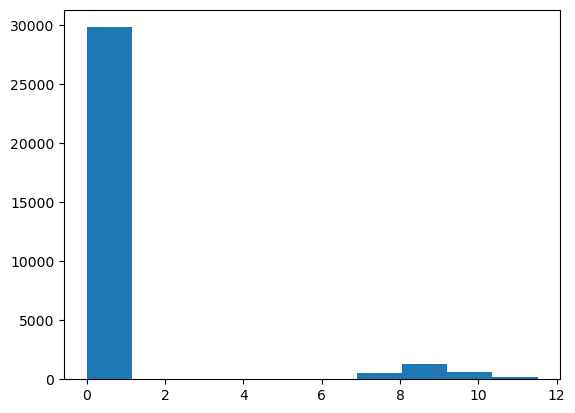

In [17]:
plt.hist(np.log1p(data.capital_gain))
plt.show()

In [18]:
data["capital_gain"] = (data.capital_gain > 0).astype(int)
data["capital_loss"] = (data.capital_loss > 0).astype(int)

In [19]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [20]:
data.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [21]:
data["native_country"] =(data.native_country == "United-States").astype(int)
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1,0,40,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,1,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,1,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,1,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,0,0


In [22]:
data.rename({"native_country": "us_native"}, axis=1, inplace=True)

In [23]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,us_native,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1,0,40,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,1,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,1,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,1,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,0,0


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [25]:
X = data.drop(["wage_class"], axis=1)
y = data.wage_class

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
num_columns = ["age", "education_num", "hours_per_week"]
cat_columns = ["workclass", "marital_status", "occupation", "relationship", "race"]
bin_columns = ["sex", "capital_gain", "capital_loss", "us_native"]

num_pipe = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("enocder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

In [28]:
from sklearn.compose import ColumnTransformer

In [29]:
preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'education_num', 'hours_per_week']),
                                ('cat',
                                 Pipeline(steps=[('enocder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['workclass', 'marital_status', 'occupation',
                                  'relationship', 'race']),
                                ('bin', 'passthrough',
                                 ['sex', 'capital_gain', 'capital_loss',
                                  'us_native'])])

In [30]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('enocder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', LogisticRegression())])

In [31]:
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [32]:
accuracy_score(y_test, pipeline.predict(X_test))

0.8510670965760786

In [33]:
y.mean()

0.2408095574460244

In [34]:
pipeline.named_steps["preprocessor"].transformers_[1][1].steps[0][1].categories_

[array(['?', 'Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
        'Self-emp-not-inc', 'State-gov'], dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
        'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
        'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
        'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
        'Transport-moving'], dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object)]

Zoptymalizuj siłę regularyzcji w reg. log. w tym pipelinie. Na skali logarytmicznej od 10^-5 do 10^5. Wykorzystaj: np.logspace.
Pamiętaj od zapewnienieu losowania kolejności w podziale na foldy. Przetestować na danych testowych.

In [36]:
param_grid = {
    "model__C": np.logspace(-5, 5, 11)
}

cv = KFold(10, shuffle=True)
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_)

accuracy_score(y_test, optimizer.best_estimator_.predict(X_test))

{'model__C': 10.0}


0.8512206356517734

In [37]:
optimizer.cv_results_["mean_test_score"]

array([0.75929018, 0.75994285, 0.82248129, 0.83906668, 0.84160034,
       0.84156203, 0.84175395, 0.84163882, 0.84171561, 0.84171561,
       0.84163879])

In [38]:
num_pipe = Pipeline([
    ("scaler", None)
])

cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

### W jednym GridSearchCV zoptymalizuj rozwiązanie wykorzystujące regresję lub drzewo. W regresji zoptymalizuj C, a w drzewie minimalną liczbę obserwacji w liściach. Dobierz odpowiednie przekształcenia do modeli. Podaj najlepszy wariant i jego jakosć.

In [40]:
param_grid = [
    {
        "preprocessor__num__scaler": [StandardScaler()],
        "preprocessor__cat__encoder__drop": ["first"],
        "model__C": np.logspace(-5, 5, 11),
        "model": [LogisticRegression()],
    },
        {
        "preprocessor__num__scaler": [None],
        "preprocessor__cat__encoder__drop": [None],
        "model__min_samples_leaf": [5, 10, 100, 1000],
        "model": [DecisionTreeClassifier()],   
    }
]

cv = KFold(10, shuffle=True)
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_)

accuracy_score(y_test, optimizer.best_estimator_.predict(X_test))

{'model': LogisticRegression(), 'model__C': 1.0, 'preprocessor__cat__encoder__drop': 'first', 'preprocessor__num__scaler': StandardScaler()}


0.8510670965760786

In [41]:
pipeline_best = pipeline

In [42]:
pipeline_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   None)]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', LogisticRegression())])

In [43]:
pipeline_best.set_params(**optimizer.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', LogisticRegression())])

In [44]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', LogisticRegression())])

In [45]:
from copy import deepcopy

pipelne_new = deepcopy(pipeline)

In [46]:
cv = KFold(10, shuffle=True)
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring="roc_auc", n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_)

{'model': LogisticRegression(), 'model__C': 1000.0, 'preprocessor__cat__encoder__drop': 'first', 'preprocessor__num__scaler': StandardScaler()}


In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
y_probs = optimizer.best_estimator_.predict_proba(X_test)[:, 1] # prawdopodobieństwa jedynek

roc_auc_score(y_test, y_probs)

0.9007381230162951

In [49]:
from sklearn.metrics import precision_score

accuracy_score(y_test, y_probs>0.5), precision_score(y_test, y_probs>0.5)

(0.8512206356517734, 0.7336956521739131)

In [50]:
from sklearn.metrics import fbeta_score

fbeta_score?

Signature:
fbeta_score(
    y_true,
    y_pred,
    *,
    beta,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the F-beta score.

The F-beta score is the weighted harmonic mean of precision and recall,
reaching its optimal value at 1 and its worst value at 0.

The `beta` parameter represents the ratio of recall importance to
precision importance. `beta > 1` gives more weight to recall, while
`beta < 1` favors precision. For example, `beta = 2` makes recall twice
as important as precision, while `beta = 0.5` does the opposite.
Asymptotically, `beta -> +inf` considers only recall, and `beta -> 0`
only precision.

The formula for F-beta score is:

.. math::

   F_\beta = \frac{(1 + \beta^2) \text{tp}}
                    {(1 + \beta^2) \text{tp} + \text{fp} + \beta^2 \text{fn}}

Where :math:`\text{tp}` is the number of true positives, :math:`\text{fp}` is the
number of false positives, and :math:`\text{fn}` i

In [51]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

cv = KFold(10, shuffle=True)
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring=ftwo_scorer, n_jobs=-1)

In [52]:
from sklearn.ensemble import BaggingClassifier

?BaggingClassifier

Init signature:
BaggingClassifier(
    estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)
Docstring:     
A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If samples are drawn with
replaceme

Zwizualizuj jakość (auc) Baggingu w zależności od liczby drzew (przy innych parametrach domyślnych)

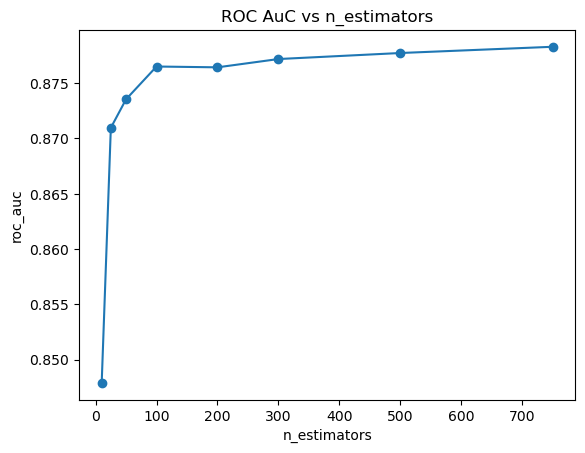

In [54]:
n_estimators = [10, 25, 50, 100, 200, 300, 500, 750]

estimators_roc_auc = []
for n in n_estimators:
    model = BaggingClassifier(None, n, n_jobs=-1)
    pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model),
        ],
    )
    pipeline.fit(X_train, y_train)
    y_probs = pipeline.predict_proba(X_test)[:, 1]
    estimators_roc_auc.append(roc_auc_score(y_test, y_probs))

plt.plot(n_estimators, estimators_roc_auc, label="n_estimators", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc")
plt.title("ROC AuC vs n_estimators")
plt.show()